In [9]:
train_data, train_label, test_data, test_label =  prepare_mnist_dataset()
pca = PCA(0.5, whiten=True)
train_data_pca = pca.fit_transform(train_data)
print(train_data_pca.shape)


************************ Loading mnist ************************
n_digits: 10
n_samples: 60000
************************ Finished mnist ************************
(60000, 11)


### Fitting Full GMM

In [4]:
print("Fitting GMM")
print(train_data.shape)
g = mixture.GaussianMixture(n_components=40, covariance_type='full')
g.fit(train_data_pca) 


Fitting GMM
(60000, 784)


GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=40, n_init=1,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [110]:
import time 
t_s = time.time()
print("Fitting GMM")
print(train_data.shape)
g = mixture.GaussianMixture(n_components=80, covariance_type='diag')
g.fit(data) 

train_pred = g.fit_predict(data)
final_pred = assign_majority(train_pred, train_label)
print("train:", np.mean(final_pred == train_label))
test_data_pca = pca.fit_transform(test_data)
test_pred = g.fit_predict(test_data_pca)
final_pred = assign_majority(test_pred, test_label)
print("Test:", np.mean(final_pred == test_label))
dt = time.time() - t_s
print(dt)

Fitting GMM
(60000, 784)
train: 0.77915
Test: 0.7967
28.329127073287964


In [100]:
final_pred = assign_majority(train_pred, train_label)
print("train:", np.mean(final_pred == train_label))
test_data_pca = pca.fit_transform(test_data)
test_pred = g.fit_predict(test_data_pca)
final_pred = assign_majority(test_pred, test_label)
print("Test:", np.mean(final_pred == test_label))

train: 0.7410333333333333
Test: 0.7565


In [95]:
test_data_pca = pca.fit_transform(test_data)

0.7522

'diag', init_params='kmeans', max_iter=100,
                means_init=None, n_components=910, n_init=1,
                precisions_init=None, random_state=0, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)
Fitting for model: GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=100,
                means_init=None, n_components=920, n_init=1,
                precisions_init=None, random_state=0, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)
Fitting for model: GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=100,
                means_init=None, n_components=930, n_init=1,
                precisions_init=None, random_state=0, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)
Fitting for model: GaussianMixture

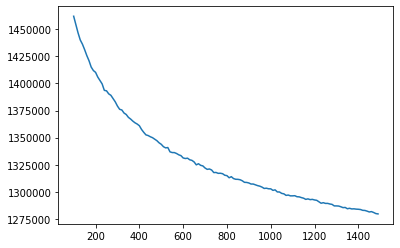

In [7]:
n_components = np.arange(100, 1500, 10)
models = [mixture.GaussianMixture(n, covariance_type='diag', random_state=0)
        for n in n_components]
aics = []
for model in models:
    print("Fitting for model:", model)
    aics.append(model.fit(train_data_pca).aic(train_data_pca) )
plt.plot(n_components, aics)

In [ ]:
print()

In [ ]:
plt.plot(aics + aics_cong)

In [ ]:
train_pred = model.fit_predict(train_data)
final_pred = assign_majority(train_pred, train_label)
np.mean(final_pred == train_label)

In [ ]:
aic

In [ ]:
from refs.mnist_em_bmm_gmm import gmm
model = gmm.gmm(20, verbose=True)